In [ ]:
import torch
torch.__version__

In [ ]:
a = torch.tensor([[1.2][3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

In [ ]:
print(a-a[0])
print(torch.exp(a)[0].numpy())

In [ ]:
u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:",u)


In [ ]:
s = torch.zeros_like(a[0])
for i in a:
    s.add_(i)
print(s)

In [ ]:
torch.sum(a,axis=0)

In [ ]:
a = torch.randn(size=(2,2), requires_grad=True)
b = torch.randn(size=(2,2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward()

print(a.grad)

In [ ]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()
c.backward()
print(a.grad)

In [ ]:
c =torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2))
print(a.grad)

In [ ]:
x = torch.zeros(2,require_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

In [ ]:
for i in range(15):
    y =f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random


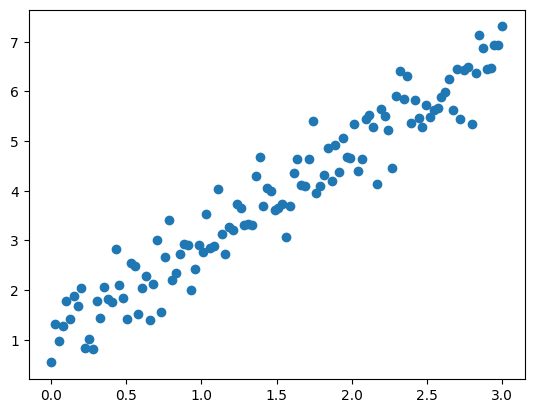

In [3]:
np.random.seed(13)

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

In [4]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

w = torch.tensor([100.0], reguires_grad=True,dtype=torch.float32)
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

NameError: name 'torch' is not defined

In [ ]:
def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss

In [ ]:
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)

In [ ]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])
        print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

NameError: name 'features' is not defined

In [ ]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
with torch.no_grad():
    y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on '+device)

w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(output_dim,),requires_grad=True,device=device)

def f(x):
  return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
  return torch.mean(torch.square(labels - predictions))

def train_on_batch(x, y):
  predictions = f(x)
  loss = compute_loss(y, predictions)
  loss.backward()
  w.data.sub_(learning_rate * w.grad)
  b.data.sub_(learning_rate * b.grad)
  w.grad.zero_()
  b.grad.zero_()
  return loss

batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(features[i:i+batch_size].view(-1,1).to(device),labels[i:i+batch_size].to(device))
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

In [1]:
np.random.seed(0)

n = 100
X, Y = make_classification(n_samples = n, n_features=2, n_redundant=0, n_informative=2, flip_y=0.1,class_sep=1.5)

X = X.astype(np.float32)
Y= Y.astype(np.int32)

split = [70*n//100, (15+70)*n//100]
train_x, valid_x, test_x = np.split(X, split)
train_labels,valid_labels,test_labels = np.split(Y, split)

NameError: name 'np' is not defined

In [ ]:
def plot_dataset(features, labels, W=None, b=None):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

In [ ]:
plot_dataset(train_x, train_labels)

In [ ]:
class Network():
    def __init__(self):
        self.W = torch.randn(size=(2,1),requires_grad=True)
        self.b = torch.zeros(size=(1,),requires_grad=True)
    
    def forward(self,x):
        return torch.matmul(x,self.W)+self.b
    
    def zero_grad(self):
        self.W.data.zero_()
        self.b.data.zero_()
        
    def update(self,lr=0.1):
        self.W.data.sub_(lr*self.W.grad)
        self.b.data.sub_(lr*self.b.grad)

net = Network()

In [ ]:
def train_on_batch(net, x, y):
    z = net.forward(x).flatten()
    loss = torch.nn.functional.binary_cross_entopy_with_logits(input=z,target=y)
    net.zero_grad()
    loss.backward()
    net.update()
    return loss